<a href="https://colab.research.google.com/github/grecoserafim/cars_machine_learning/blob/main/cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [32]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.drop('car_ID', axis=1, inplace=True)

display(df)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Estudo do Dataset

Inicialmente ja observa-se que a coluna Carname está com a marca e o nome do modelo do carro, vamos adicionar mais uma coluna para melhorar a organização

In [33]:
df['Brand'] = ''
df['Model_car'] = ''

# separar a coluna "CarName" em duas colunas
df[['Brand', 'Model_car']] = df['CarName'].str.split(' ', n=1, expand=True)



In [34]:
display(df)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand,Model_car
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,145e (sw)
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,144ea
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,244dl
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,246


In [35]:
df.drop('CarName', axis=1, inplace=True)

df = df[['Brand', 'Model_car'] + [col for col in df.columns if col not in ['Brand', 'Model_car']]]

In [36]:
display(df)

,Brand,Model_car,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,giulia,3,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,stelvio,3,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,Quadrifoglio,1,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,100 ls,2,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,100ls,2,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,145e (sw),-1,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,volvo,144ea,-1,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,volvo,244dl,-1,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,volvo,246,-1,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [37]:
brand = df["Brand"].unique()
brand_size = len(brand)

print("Lista de marcas: ", brand)
print("Número total de marcas: ", brand_size)

Lista de marcas:  ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
Número total de marcas:  28


Foi notado algumas marcas se repetindo, vamos corrigir isso

In [38]:
df['Brand'] = df['Brand'].replace(['nissan', 'Nissan'], 'nissan')
df['Brand'] = df['Brand'].replace(['porsche', 'porcshce'], 'porsche')
df['Brand'] = df['Brand'].replace(['toyota', 'toyouta'], 'toyota')
df['Brand'] = df['Brand'].replace(['volkswagen', 'vokswagen', 'vw'], 'volkswagen')

brand = df["Brand"].unique()
brand_size = len(brand)

print("Lista de marcas: ", brand)
print("Número total de marcas: ", brand_size)

Lista de marcas:  ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
Número total de marcas:  23


Análise de Colunas em relação ao Preço

In [39]:
X = df.copy()
y = X.pop("price")

from sklearn.preprocessing import LabelEncoder

for colname in X.select_dtypes("object"):
    le = LabelEncoder()
    X[colname] = le.fit_transform(X[colname])
    

discrete_features = X.dtypes == int

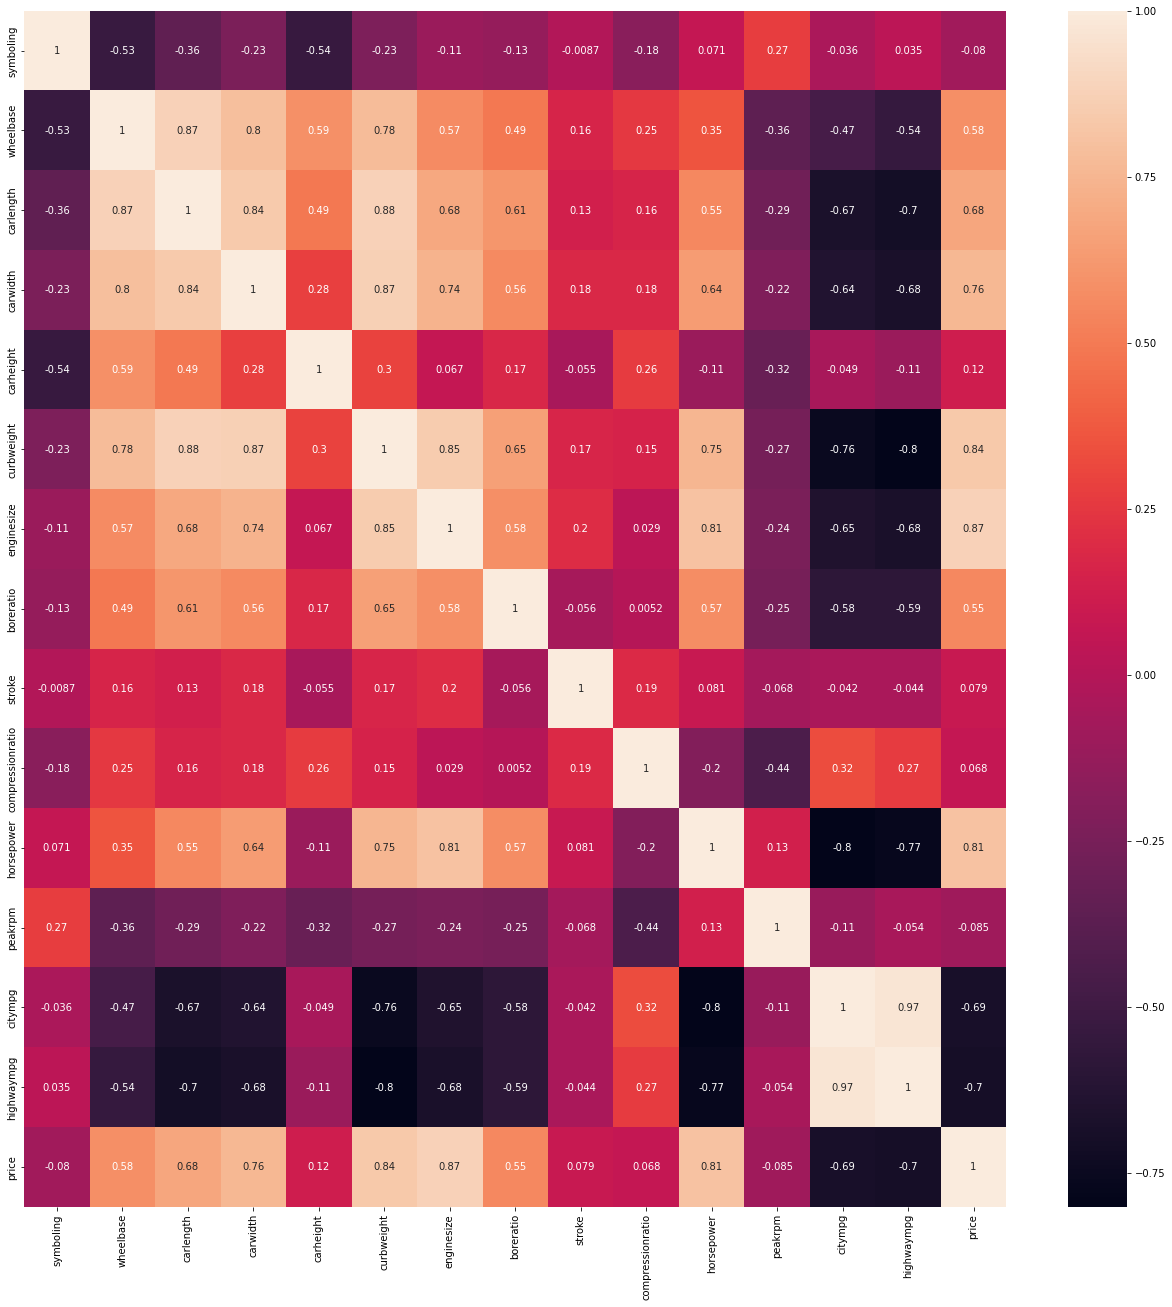

In [40]:
import seaborn as sns
plt.figure(figsize=(22,22))
sns.heatmap(df.corr() , annot=True);

# Machine Learning Models

Decision Tree

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"max_leaf_nodes": [1, 10, 100, 1000]}

dt = DecisionTreeRegressor()

grid_dt = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_dt.fit(X, y)

print("Melhor valor de max_leaf_nodes: ", grid_dt.best_params_['max_leaf_nodes'])

Melhor valor de max_leaf_nodes:  100


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 581, in _validate_para

100 foi o melhor resultado para a Decision Tree

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [45]:
model1 = DecisionTreeRegressor(max_leaf_nodes=100, random_state=42)

# Treinando o modelo com os dados de treino
model1.fit(X_train, y_train)

# Realizando a predição com os dados de teste
y_pred = model1.predict(X_test)

# Calculando o erro médio absoluto
from sklearn.metrics import mean_absolute_error


mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)



Mean Absolute Error: 1826.2755322580647


In [46]:
from sklearn.metrics import r2_score

y_pred = model1.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"O coeficiente de determinação (R²) do modelo é {r2:.2f}")

O coeficiente de determinação (R²) do modelo é 0.90


Random Florest

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# valores para serem testados:
n_estimators_list = [1, 10, 100, 1000]

#variavel para testar melhor desenpenho
best_score = -float('inf')
best_n_estimators = None

for n_estimators in n_estimators_list:
    # cria o modelo com o valor atual de n_estimators
    model_n = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    
    # treina o modelo
    model_n.fit(X_train, y_train)
    
    # faz as previsões para os dados de teste
    y_pred = model_n.predict(X_test)
    
    # calcula o desempenho do modelo usando o coeficiente de determinação (R²)
    score = r2_score(y_test, y_pred)
    
    # atualiza as variáveis de melhor desempenho, se necessário
    if score > best_score:
        best_score = score
        best_n_estimators = n_estimators

print(f"Melhor valor de n_estimators: {best_n_estimators}")

Melhor valor de n_estimators: 1000


In [48]:
from sklearn.ensemble import RandomForestRegressor

# Definir modelo com 1000 árvores
model2 = RandomForestRegressor(n_estimators=1000, random_state=42)

# Treinar modelo com dados de treino
model2.fit(X_train, y_train)

# Avaliar desempenho em dados de teste
score = model2.score(X_test, y_test)
print("R² score do modelo de Random Forest: {:.2f}".format(score))

R² score do modelo de Random Forest: 0.94


XGBoost

In [49]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

XGB_score = []
for n in [1, 10, 100, 1000]:
    XGB_model = XGBRegressor(n_estimators=n, random_state=42)
    scores = cross_val_score(XGB_model, X, y, cv=5)
    XGB_score.append((n, scores.mean(), scores.std()))
    
XGB_score

[(1, -1.8219680544355596, 1.3840169426175946),
 (10, 0.44149280604065255, 0.6634843704398233),
 (100, 0.4051958485076438, 0.7783703797911798),
 (1000, 0.40522573315252963, 0.7783132039366524)]

vamos utilizar o mil, por ter melhor score e a menor diferença absoluta em relação ao score médio.

In [50]:
from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

XGB_model = XGBRegressor(n_estimators=1000, random_state=42)
XGB_model.fit(X_train, y_train)

y_pred = XGB_model.predict(X_test)
print("R² score:", r2_score(y_test, y_pred))

R² score: 0.9147219930988849


Foi notado que o Random Florest foi o modelo que obtive melhor desempenho para o treinamento de compras de carros